## DIGITS Decision Tree

In [ ]:
import numpy as np                     # Llibreria matemÃ tica
import matplotlib.pyplot as plt        # Per mostrar plots
import sklearn                         # Llibreia de DM
import sklearn.datasets as ds            # Per carregar mÃ©s facilment el dataset digits
import sklearn.model_selection as cv    # Pel Cross-validation
import sklearn.neighbors as nb           # Per fer servir el knn
import pandas as pd
from sklearn.preprocessing import StandardScaler
from google.colab import drive

import warnings
from sklearn.exceptions import DataConversionWarning

warnings.filterwarnings(action='ignore', category=DataConversionWarning)
warnings.filterwarnings("ignore", category=DeprecationWarning)



In [ ]:
#Function that shows the confusion matrix with a pretty Layout
def  prettyConfusionMatrix(confmat):
  fig, ax = plt.subplots(figsize=(2.5, 2.5))
  ax.matshow(confmat, cmap=plt.cm.Blues, alpha=0.3)
  for i in range(confmat.shape[0]):
      for j in range(confmat.shape[1]):
          ax.text(x=j, y=i, s=confmat[i, j], va='center', ha='center',fontsize=7)

  plt.xlabel('Predicted label')
  plt.ylabel('True label')

  plt.tight_layout()
  plt.savefig('ConMatrix.png', dpi=600)
  plt.show()
  return

def preprocessedData(balncesd):
  if balanced:
    getBalncedData


In [ ]:
from IPython.display import display, HTML

def reportClassesDataframe(report):
    report = [x.split(' ') for x in report.split('\n')]
    header = ['Class Name']+[x for x in report[0] if x!='']
    values = []
    for row in report[1:-5]:
        row = [value for value in row if value!='']
        if row!=[]:
            values.append(row)
    df = pd.DataFrame(data = values, columns = header)
    return df

def reportAccuracyDF(report):
  report = [x.split('      ') for x in report.split('\n')]
  values = []
  report[6].pop(2)
  df = pd.DataFrame(report[6:9])
  return df

def prettyReport(report):
    df = reportClassesDataframe(report)
    df2 = reportAccuracyDF(report)
    display(HTML(df.to_html(index=False,justify="center")))
    print("\n")
    display(HTML(df2.to_html( header=False,index=False,justify="center")))
    df
    df2
    return


## 2. Load our data

In [ ]:
drive.mount("/content/drive")

%matplotlib inline 

#link train_labels
linkLabels = "/content/drive/MyDrive/Colab Notebooks/train_labels_Prep.csv"

#link train_labels
linkValues = "/content/drive/MyDrive/Colab Notebooks/train_values_Prep_ME.csv"

#link train_labelsB
linkLabelsB = "/content/drive/MyDrive/Colab Notebooks/train_labels_Prep_Bal.csv"

#link train_labelsB
linkValuesB = "/content/drive/MyDrive/Colab Notebooks/train_values_Prep_ME_Bal.csv"


#Read num_rows_to_read first rows
#num_rows_to_read = 40000
X = pd.read_csv(linkValues)

y = pd.read_csv(linkLabels)

XB = pd.read_csv(linkValuesB)
yB = pd.read_csv(linkLabelsB)

(X_train, X_test,  y_train, y_test) = cv.train_test_split(X, y, test_size=.3, random_state=5)

(X_trainB, X_testB,  y_trainB, y_testB) = cv.train_test_split(XB, yB, test_size=.3, random_state=5)



Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## Selecting between unBalanced and Balanced

First, we have to decide if we balance our dataset or not, to do this we run a comparision between doing it balanced and not, and we choose the better perfoming one as the choice for the rest of the training.

In [ ]:
from sklearn.naive_bayes import GaussianNB  # For numerical featuresm assuming normal distribution
from sklearn.naive_bayes import MultinomialNB  # For features with counting numbers (f.i. hown many times word appears in doc)
from sklearn.naive_bayes import BernoulliNB  # For binari features (f.i. word appears or not in document)
from sklearn.metrics import confusion_matrix
# interval confidence
from statsmodels.stats.proportion import proportion_confint
# No parameters to tune
print("------------------Naive Bayes--------------------")
print("Metrics of unBalanced Dataset")
print()
clf = GaussianNB()
pred = clf.fit(X_train, y_train).predict(X_test)
confmat = sklearn.metrics.confusion_matrix(y_test, pred)
#prettyConfusionMatrix(confmat)
print()
print("Accuracy:", sklearn.metrics.accuracy_score(y_test, pred))
print()
#print(sklearn.metrics.classification_report(y_test, pred))
epsilon = sklearn.metrics.accuracy_score(y_test, pred)
proportion_confint(count=epsilon*X_test.shape[0], nobs=X_test.shape[0], alpha=0.05, method='binom_test')
print()
print("--------------------------------------")
print()
print("Metrics of Balanced Dataset")
print()
clfB = GaussianNB()
predB = clf.fit(X_trainB, y_trainB).predict(X_testB)
confmat = sklearn.metrics.confusion_matrix(y_testB, predB)
#prettyConfusionMatrix(confmat)
#print(confusion_matrix(y_testB, predB))
print()
print("Accuracy:", sklearn.metrics.accuracy_score(y_testB, predB))
report = sklearn.metrics.classification_report(y_testB, predB)
print
prettyReport(report)
#print(sklearn.metrics.classification_report(y_testB, predB))
epsilonB = sklearn.metrics.accuracy_score(y_testB, predB)
#proportion_confint(count=epsilon*X_testB.shape[0], nobs=X_testB.shape[0], alpha=0.05, method='binom_test')


------------------Naive Bayes--------------------
Metrics of unBalanced Dataset


Accuracy: 0.41683333333333333


--------------------------------------

Metrics of Balanced Dataset


Accuracy: 0.5322952710495963


/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


### Train and Print A Decision Tree

Metrics of unBalanced Dataset



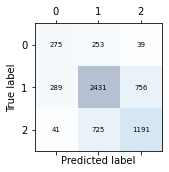


Accuracy: 0.6495



(0.6373397611394988, 0.66150770311202)


--------------------------------------


Metrics of Balanced Dataset



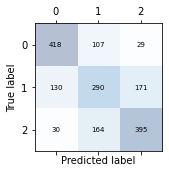


Accuracy: 0.6361014994232987



(0.6130527754630337, 0.6586203203971346)


In [ ]:
from sklearn import tree

clf = tree.DecisionTreeClassifier(criterion='entropy')
clf = clf.fit(X_train, y_train)
pred = clf.predict(X_test)

print("Metrics of unBalanced Dataset")
print()
# Obtain accuracy score of learned classifier on test data
#print(clf.score(X_test, y_test))
confmat = sklearn.metrics.confusion_matrix(y_test, pred)
prettyConfusionMatrix(confmat)
print()
print("Accuracy:", sklearn.metrics.accuracy_score(y_test, pred))
print()
prettyReport(sklearn.metrics.classification_report(y_test, pred))
epsilon = sklearn.metrics.accuracy_score(y_test, pred)
print(proportion_confint(count=epsilon*X_test.shape[0], nobs=X_test.shape[0], alpha=0.05, method='binom_test'))
print()
print()
print("--------------------------------------")
print()
print()
print("Metrics of Balanced Dataset")
print()
clfB = tree.DecisionTreeClassifier(criterion='entropy')
clfB = clf.fit(X_trainB, y_trainB)
predB = clf.predict(X_testB)

# Obtain accuracy score of learned classifier on test data
#print(clf.score(X_testB, y_testB))
confmat = sklearn.metrics.confusion_matrix(y_testB, predB)
prettyConfusionMatrix(confmat)
print()
print("Accuracy:", sklearn.metrics.accuracy_score(y_testB, predB))
print()
prettyReport(sklearn.metrics.classification_report(y_testB, predB))
epsilon = sklearn.metrics.accuracy_score(y_testB, predB)
print(proportion_confint(count=epsilon*X_testB.shape[0], nobs=X_testB.shape[0], alpha=0.05, method='binom_test'))


Here we can observe that the larger but unbalanced dataset has a better accuracy respect to the smaller but balanced dataset.
## Represtation of a Decision Tree
For the next segment, we create a represantation of a decision tree with the parameters min_samples_split=2 and min_impurity_decrease=0.02.With this parameters we obtain a poorer accuracy, but a more legible tree, had we chosen the default settings we would have gotten an unlegible graph with hundreds of braches and leaves.

In [ ]:
import pydotplus
from sklearn.datasets import load_iris
from sklearn import tree
import collections



dot_data = tree.export_graphviz(clf,
                                out_file=None,
                                filled=True,
                                rounded=True)
graph = pydotplus.graph_from_dot_data(dot_data)

colors = ('brown', 'forestgreen','blue')
edges = collections.defaultdict(list)

for edge in graph.get_edge_list():
    edges[edge.get_source()].append(int(edge.get_destination()))

for edge in edges:
    edges[edge].sort()    
    for i in range(2):
        dest = graph.get_node(str(edges[edge][i]))[0]
        dest.set_fillcolor(colors[i])

print(graph)

0.7174163783160323


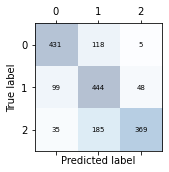


Accuracy: 0.7174163783160323



Interval of confidence: (0.6955367700526366, 0.7382173423870422)


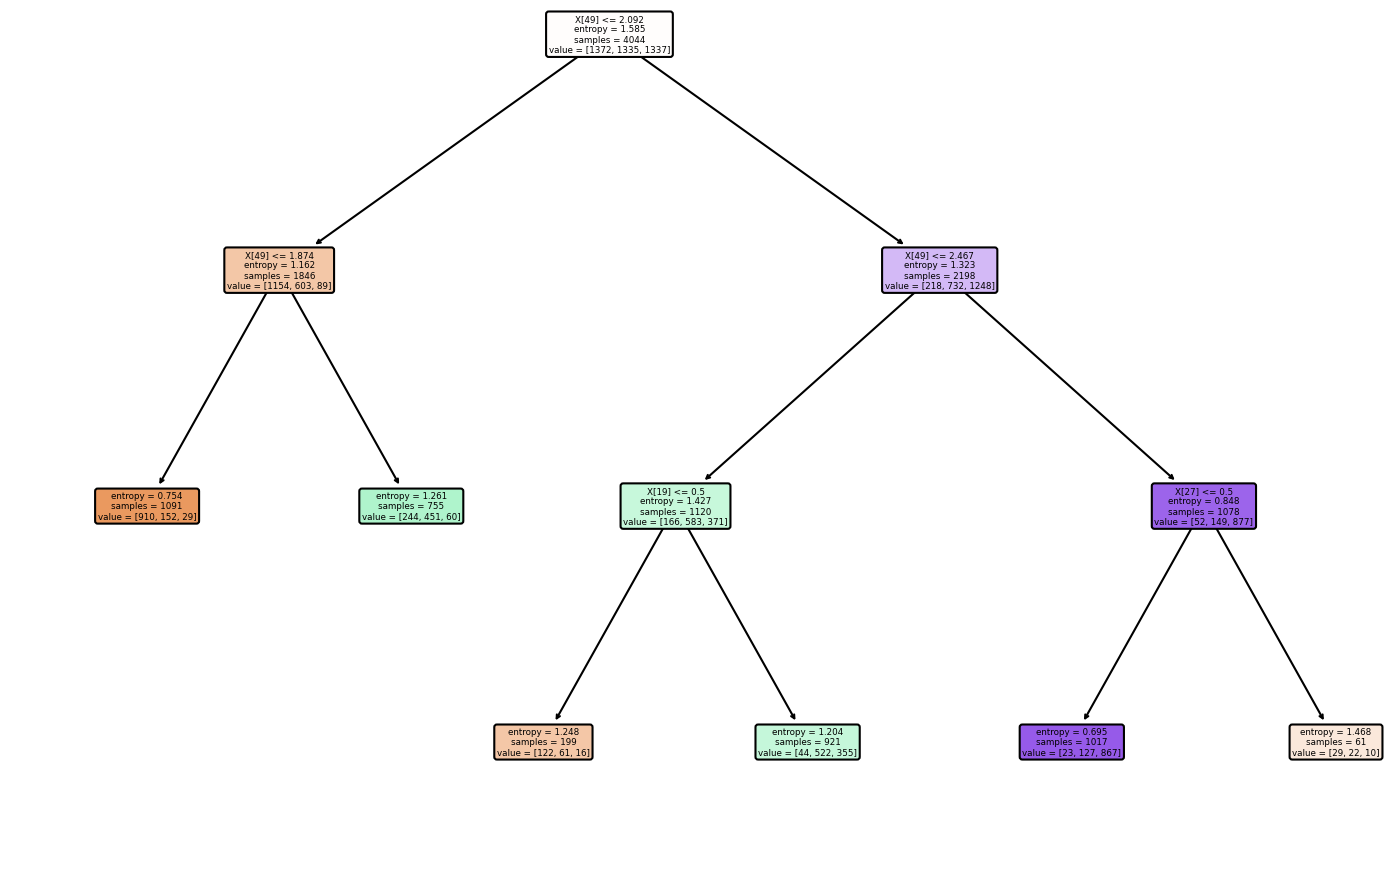

In [ ]:
X_train = X_trainB
y_train = y_trainB
X_test = X_testB
y_test = y_testB

clf=tree.DecisionTreeClassifier(criterion='entropy', min_samples_split=2,min_impurity_decrease=0.02)
clf = clf.fit(X_train, y_train)
pred = clf.predict(X_test)

# Obtain accuracy score of learned classifier on test data
print(clf.score(X_test, y_test))
confmat = sklearn.metrics.confusion_matrix(y_test, pred)
prettyConfusionMatrix(confmat)
print()
print("Accuracy:", sklearn.metrics.accuracy_score(y_test, pred))
print()
prettyReport(sklearn.metrics.classification_report(y_test, pred))
epsilon = sklearn.metrics.accuracy_score(y_test, pred)
print("Interval of confidence:", proportion_confint(count=epsilon*X_test.shape[0], nobs=X_test.shape[0], alpha=0.05, method='binom_test'))

fig = plt.gcf()
fig.set_dpi(150)
tree.plot_tree(clf, filled=True,rounded=True)
fig.savefig('Balancedtree.png')
plt.show()


In the tree, we can observe how it only selects the target class number two as answer. For example the balanced dataset has a much more interesting decision tree with this parameters

## Selecting the best parameters

We decided to test 4 different parameters:


*   Criterion: The function to measure the quality of a split. It can be either “gini” for the Gini impurity or “entropy” for the information gain.
*   splitter: The strategy used to choose the split at each node. Possible  strategies are “best” to choose the best split and “random” to choose the best random split.
*   min_impurity_decrease: A node will be split if this split induces a decrease of the impurity greater than or equal to this value. It will be range betwen 0.0 and 0.5
*   min_samples_split: The minimum number of samples required to be at a leaf node. It will be arange between 2 and 20.


In [ ]:
from sklearn.model_selection import GridSearchCV
params = {
    'criterion': ['entropy','gini'],
    'splitter': ['best','random'],
    'min_impurity_decrease': list(np.linspace(0,0.5,50)),
    'min_samples_split':list(range(2,20,5)),
    'class_weight': ['balanced',
                     {1:1,2:2,3:2},{1:2,2:1,3:2},{1:2,2:2,3:1},
                     {1:1,2:2,3:4},{1:2,2:1,3:4},
                     {1:1,2:4,3:2},{1:2,2:4,3:1},
                     {1:4,2:1,3:2},{1:4,2:2,3:1}
                    ]
                     
    }

clf = GridSearchCV(tree.DecisionTreeClassifier(), param_grid=params,cv=10,n_jobs=-1)

  # If cv is integer, by default is Stratifyed 
clf.fit(X_train, y_train)
print("Best Params=",clf.best_params_, "Accuracy=", clf.best_score_)
  

Best Params= {'class_weight': {1: 2, 2: 2, 3: 1}, 'criterion': 'gini', 'min_impurity_decrease': 0.01020408163265306, 'min_samples_split': 2, 'splitter': 'best'} Accuracy= 0.7292232000977875


0.7301038062283737


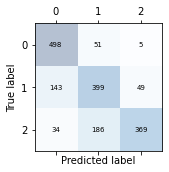


Accuracy: 0.7301038062283737



Interval of confidence: (0.7085146523490622, 0.7506192186842943)


In [ ]:

clf=tree.DecisionTreeClassifier(
    criterion=clf.best_params_['criterion'],
    splitter=clf.best_params_['splitter'],
    min_samples_split=clf.best_params_['min_samples_split'],
    min_impurity_decrease=clf.best_params_['min_impurity_decrease'],
    class_weight=clf.best_params_['class_weight']
    )
clf = clf.fit(X_train, y_train)
pred = clf.predict(X_test)

# Obtain accuracy score of learned classifier on test data
print(clf.score(X_test, y_test))
confmat = sklearn.metrics.confusion_matrix(y_test, pred)
prettyConfusionMatrix(confmat)
print()
print("Accuracy:", sklearn.metrics.accuracy_score(y_test, pred))
print()
prettyReport(sklearn.metrics.classification_report(y_test, pred))
epsilon = sklearn.metrics.accuracy_score(y_test, pred)
print("Interval of confidence:", proportion_confint(count=epsilon*X_test.shape[0], nobs=X_test.shape[0], alpha=0.05, method='binom_test'))





In [ ]:
fig = plt.gcf()
fig.set_size_inches(8, 8)
fig.set_dpi(400)

tree.plot_tree(clf, filled=True,rounded=True)
fig.savefig('BestDT.png')
plt.show()

In [ ]:
fig = plt.gcf()
fig.set_dpi(800)
tree.plot_tree(clf, filled=True,rounded=True)
fig.savefig('Balancedtree.png')
plt.show()

## Columnas relevantes

In [ ]:
columns = list(X.columns)
print(columns[49])
print(columns[27])
print(columns[24])
print(columns[1])

geo_level_3_id_enc
ground_floor_type_v
roof_type_x
age
